In [10]:
#Import modules
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [11]:
#Import data
path = r'C:\\Users\\Robert\\Documents\\python_scripts\\stock_trading_ml_modelling\\historical_prices'
ledger_df = pd.read_csv(path+r'\\trades_ledger_log_reg_mod.csv')
ledger_df.dropna(axis=0,inplace=True)
ledger_df['buy_date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in ledger_df['buy_date']]
ledger_df['sell_date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in ledger_df['sell_date']]
print(ledger_df.shape)
print(ledger_df.dtypes)
ledger_df.head()

(3148, 11)
Unnamed: 0               int64
ticker                  object
share_vol                int64
buy_spend              float64
buy_prob               float64
buy_date        datetime64[ns]
sell_spend             float64
sell_prob              float64
sell_date       datetime64[ns]
periods_held           float64
profit_loss            float64
dtype: object


,Unnamed: 0,ticker,share_vol,buy_spend,buy_prob,buy_date,sell_spend,sell_prob,sell_date,periods_held,profit_loss
0,0,MSLH,421,99888.07,0.543768,2001-03-05,-97200.01,0.723422,2001-03-12,1.0,-2688.06
1,1,MSLH,416,99815.44,0.495630,2001-08-06,-97343.52,0.455571,2001-08-13,1.0,-2471.92
2,2,MSLH,396,99871.72,0.409974,2002-02-04,-112962.88,0.630567,2002-06-03,17.0,13091.16
3,3,MSLH,337,99907.64,0.661124,2002-06-10,-100946.84,0.452559,2002-06-24,2.0,1039.20
4,4,MSLH,365,99836.60,0.523738,2003-09-22,-100942.60,0.487771,2003-09-29,1.0,1106.00


In [18]:
#Calculate ROI
ledger_df['roi'] = ledger_df['profit_loss'] / ledger_df['buy_spend']
print('''\nROI STATS:
    AVERAGE ROI %: {:.2f}
    AVERAGE POS ROI %: {:.2f}
    AVERAGE POS COUNT: {:.0f}
    AVERAGE NEG ROI %: {:.2f}
    AVERAGE NEG COUNT: {:.0f}
\nPERIODS HELD STATS:
    AVERAGE PERIODS HELD: {:.2f}
    AVERAGE POS ROI PERIODS HELD: {:.2f}
    AVERAGE NEG ROI PERIODS HELD: {:.2f}
    '''.format(
    ledger_df['roi'].mean()*100
    ,ledger_df[ledger_df['roi'] > 0]['roi'].mean()*100
    ,len(ledger_df[ledger_df['roi'] > 0])
    ,ledger_df[ledger_df['roi'] <= 0]['roi'].mean()*100
    ,len(ledger_df[ledger_df['roi'] <= 0])
    ,ledger_df['periods_held'].mean()
    ,ledger_df[ledger_df['roi'] > 0]['periods_held'].mean()
    ,ledger_df[ledger_df['roi'] <= 0]['periods_held'].mean()
))


ROI STATS:
    AVERAGE ROI %: 12.26
    AVERAGE POS ROI %: 17.45
    AVERAGE POS COUNT: 2406
    AVERAGE NEG ROI %: -4.59
    AVERAGE NEG COUNT: 742

PERIODS HELD STATS:
    AVERAGE PERIODS HELD: 10.90
    AVERAGE POS ROI PERIODS HELD: 12.40
    AVERAGE NEG ROI PERIODS HELD: 6.02
    


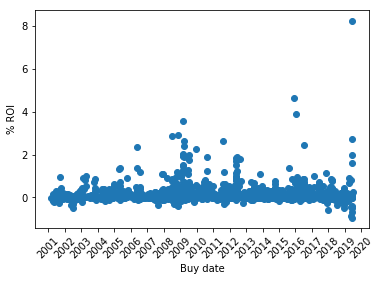

In [13]:
#ROI % by date
fig,ax = plt.subplots()

#matplotlib formatting for dates
years = mdates.YearLocator()
month = mdates.MonthLocator()
dates_fmt = mdates.DateFormatter('%Y')

#Format the x-axis
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(dates_fmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel(r'Buy date')

#Format the y-axis
ax.set_ylabel(r'% ROI')

ax.set_title = r'ROI % by buy_date'

tmp_df = ledger_df[ledger_df['roi']<10]
ax.scatter(tmp_df['buy_date'].tolist(),tmp_df['roi'])

C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


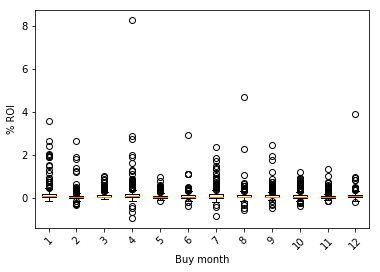

In [14]:
#ROI % by month
ledger_df['month'] = [x.month for x in ledger_df['buy_date']]
fig,ax = plt.subplots()

#Format the x-axis
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel(r'Buy month')

#Format the y-axis
ax.set_ylabel(r'% ROI')

ax.set_title = r'ROI % by buy_date'

tmp_df = ledger_df[ledger_df['roi']<10]
data = []
labels = []
for i in tmp_df['month'].unique():
    labels.append(i)
    data.append(tmp_df.loc[tmp_df['month'] == i,'roi'].tolist())
ax.boxplot(data)
fig.show()

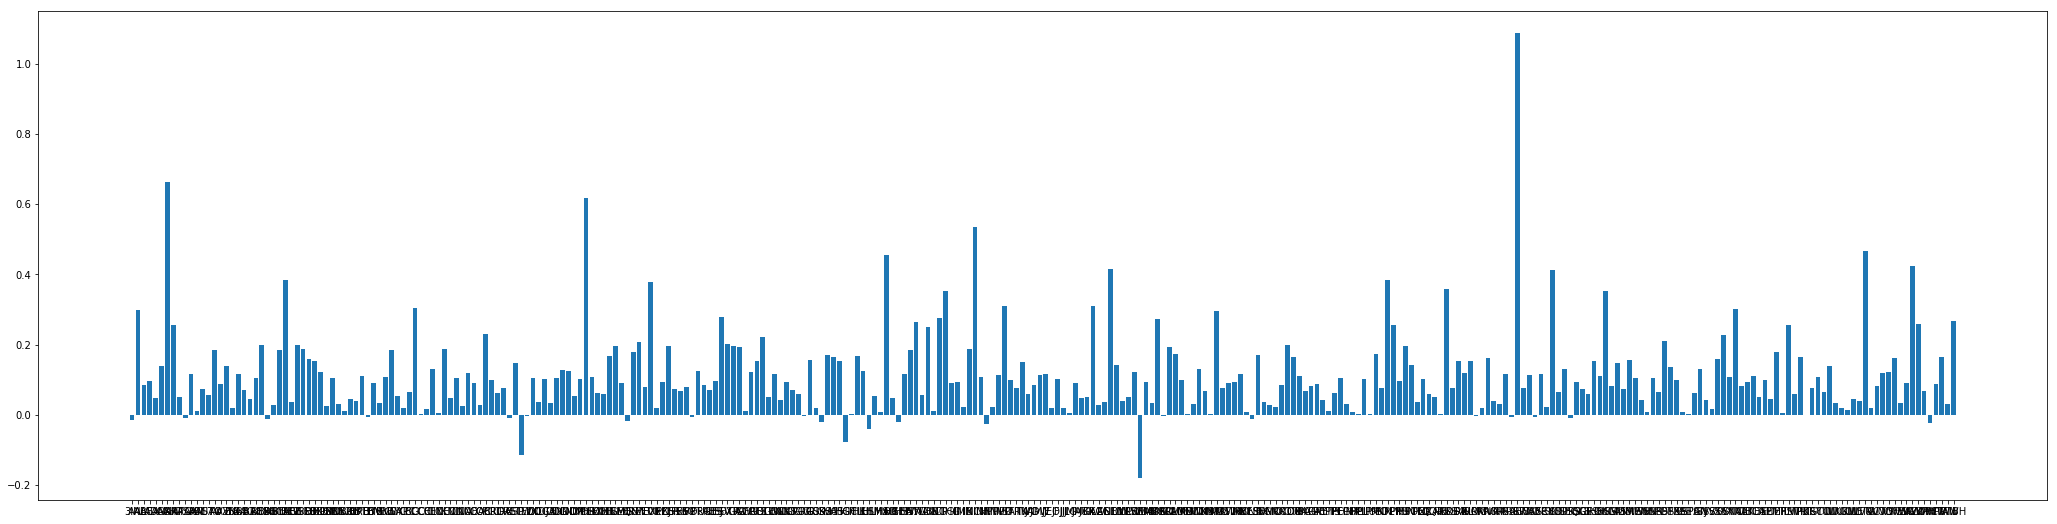

In [15]:
#ROI % by ticker

#Create a mean and median ROI for each ticker
tmp_df = ledger_df[['ticker','roi']].groupby(['ticker']).mean()
tmp_df.rename(columns={'roi':'mean'},inplace=True)
tmp_df['median'] = ledger_df[['ticker','roi']].groupby(['ticker']).median()
tmp_df.rename(columns={'roi':'median'},inplace=True)
tmp_df

fig,ax = plt.subplots(figsize=(36,9))
man_bar = ax.bar(tmp_df.index,tmp_df['mean'])
plt.show()

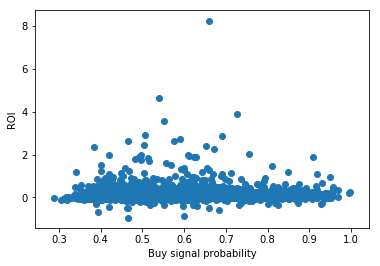

In [16]:
#ROI by signal prob 
fig,ax = plt.subplots()
tmp_df = ledger_df[ledger_df['roi']<10]
ax.scatter(tmp_df['buy_prob'],tmp_df['roi'])
ax.set_xlabel('Buy signal probability')
ax.set_ylabel('ROI')
plt.show()